# Customer Segmentation Analysis

## Business Understanding

### Problem Statement

Businesses often struggle to understand the diverse needs and behaviors of their customer base. A one-size-fits-all approach to marketing and customer engagement can lead to suboptimal results. By segmenting customers based on their demographic and behavioral data, businesses can tailor their marketing efforts to meet the specific needs of each segment, thereby enhancing customer satisfaction and boosting sales.

## Main Objective

To analyze customer data to identify distinct segments within the customer base. This segmentation will help in developing targeted marketing strategies, improving customer satisfaction, and increasing sales.

#### Key Objectives

- Analyze the demographic and behavioral traits of each segment to understand their preferences and needs.

- Create customized marketing and engagement strategies for each segment to improve customer satisfaction and increase sales.

- Describe each segment based on key demographic and behavioral attributes.

- Provide recommendations for targeted marketing and customer engagement strategies.

## Data Understanding

This dataset was extracted from Kaggle


- Dataset Size: 1000 rows, 9 columns

Column Types:

- Numeric: id, age, income, spending_score, membership_years, purchase_frequency, last_purchase_amount

- Categorical: gender, preferred_category

- id: Unique identifier for each customer.
- age: Age of the customer.
- gender: Gender of the customer (Male, Female, Other).
- income: Annual income of the customer (in USD).
- spending_score: Spending score (1-100), indicating the customer's spending behavior and loyalty.
- membership_years: Number of years the customer has been a member.
- purchase_frequency: Number of purchases made by the customer in the last year.
- preferred_category: Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).
- last_purchase_amount: Amount spent by the customer on their last purchase (in USD).

## Data Preparation

In [1]:
#import necessary libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')
#first five rows
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
#last 5 rows
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


In [5]:
#number of rows and columns
df.shape

(1000, 9)

In [7]:
#information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [8]:
#statistics on the dataset
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


## Data Cleaning

In [9]:
#Check for missing Values
missing_values = df.isnull().sum()
print(missing_values)

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [10]:
# check for duplicate values
df.duplicated().sum()

0

Obsevation

- There are no duplicates or missing values in our dataset.

### Feature Engineering

In [11]:
df_encoded = pd.get_dummies(df, columns=['gender', 'preferred_category'], drop_first=True)


In [13]:
#display the first first rows
df_encoded.head()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,1,38,99342,90,3,24,113.53,False,False,False,True,False,False
1,2,21,78852,60,2,42,41.93,False,False,False,False,False,True
2,3,60,126573,30,2,28,424.36,False,False,False,False,False,False
3,4,40,47099,74,9,5,991.93,False,True,False,False,True,False
4,5,65,140621,21,3,25,347.08,False,False,True,False,False,False


##  Exploratory Data Analysis(EDA)

#### - Univariate Analysis

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


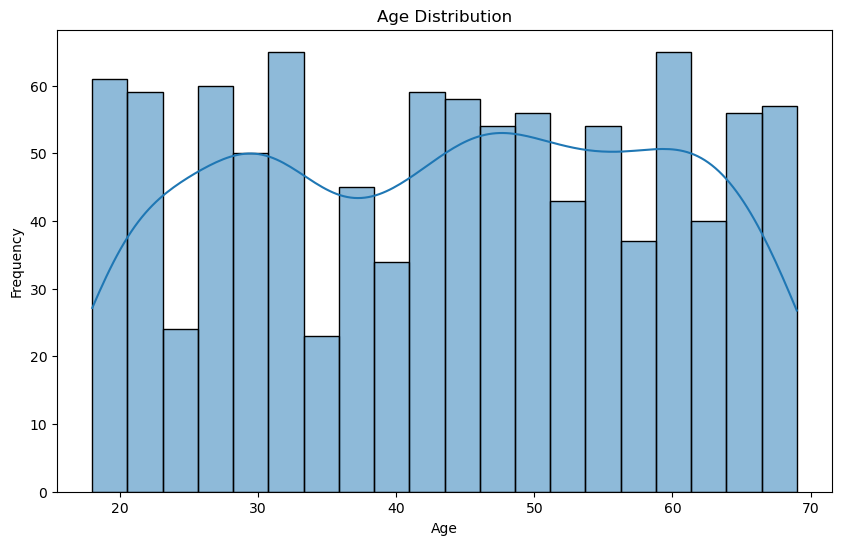

In [16]:
#Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- Most customers are aged between 30 and 60 years, with a peak around 45 years. There is a smaller number of younger and older customers.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


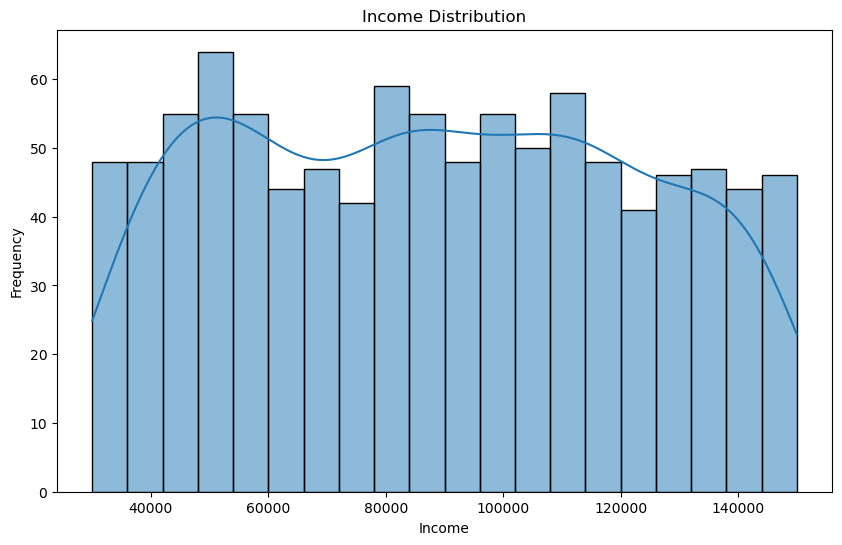

In [17]:
#Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


- Customer income is widely distributed, with a significant number of customers earning between $ 50,000  and  $ 120,000 annually.
There are fewer customers in the lower and higher income ranges.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


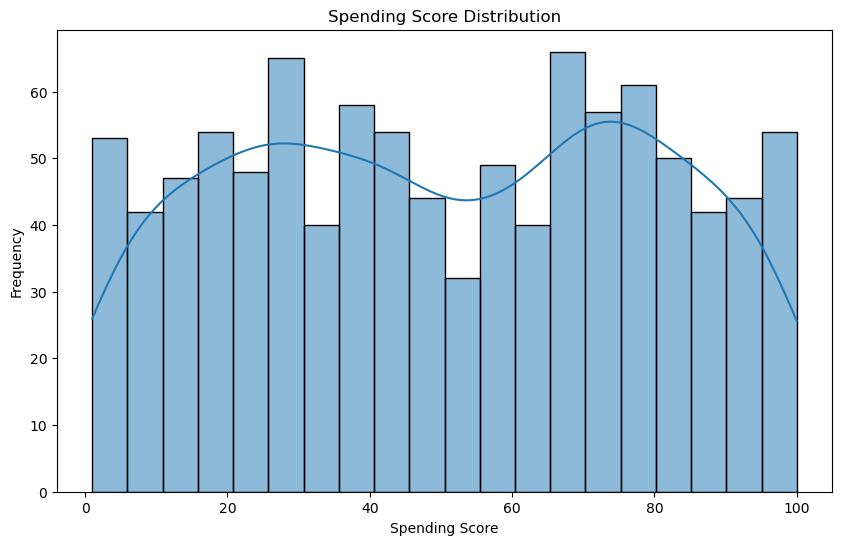

In [25]:
## Spending Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['spending_score'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

- Spending scores are fairly evenly distributed, but there is a noticeable concentration around the 50-75 range, indicating a significant portion of customers with moderate to high spending behavior.

#### -Bivariate Analysis

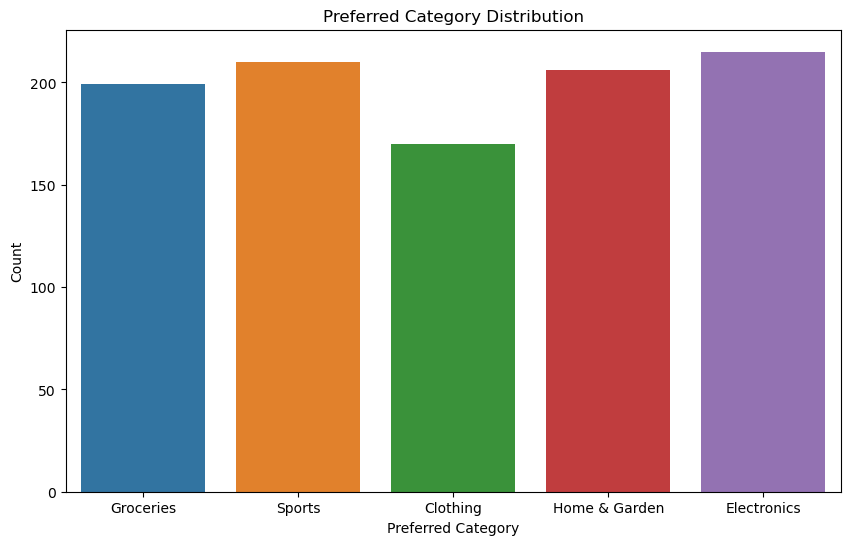

In [22]:
# Segmentation Insights
## Preferred Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='preferred_category', data=df)
plt.title('Preferred Category Distribution')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.show()

- Sports is the most preferred category, followed by Groceries, Electronics, Clothing, and Home & Garden. This distribution indicates that marketing strategies should prioritize the Sports category for maximum impact, followed by Groceries and Electronics.

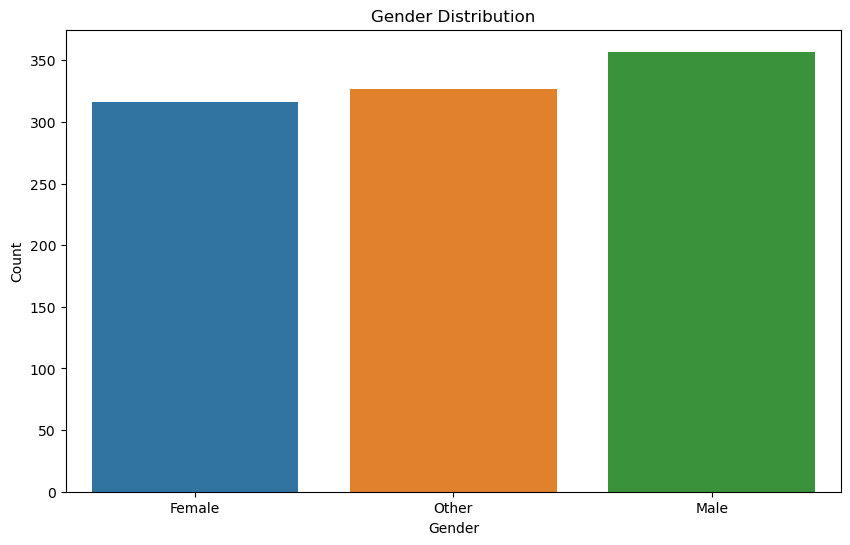

In [23]:
## Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- The dataset has a higher number of male customers, followed by those identified as 'Other', and then female customers. This indicates that marketing messages should be primarily tailored to appeal to male customers, with additional considerations for the 'Other' and female groups.